In [83]:
from bisect import bisect
from itertools import accumulate, repeat
import matplotlib.pyplot as plt
import numpy as np

global Xo

def gcl_set_semilla(semilla=int((101187 + 102323 +102291 + 102321)/4)):
    global Xo
    Xo = semilla

def gcl_normalizado(iteraciones):

    m = 2**32
    a = 1013904223
    c = 1664525
    global Xo

    numeros_aleatorios = []
    for i in range(0, iteraciones):
        X = (a * Xo + c) % m
        numeros_aleatorios.append(X/m)
        Xo = X

    return numeros_aleatorios

Para la siguiente función de probabilidad empírica se pide:

a) Desarrolle un algoritmo para generar la distribución de probabilidad anterior utilizando el generador de números
aleatorios implementado en el ejercicio 1 (Prob 'A' 0.1, 'B' 0.5, 'C' 0.3, 'D' 0.1)

In [84]:
def generar_elementos_random(elementos, pesos=None, cant=1):
    n = len(elementos)

    if pesos is None:
	    pesos = [1 for i in repeat(None, n)] #Si no me definieron los pesos entonces son equiprobables

    pesos_acumulados = list(accumulate(pesos))
    total = pesos_acumulados[-1] #Ultimo elemento, equivalente a n - 1
    lo = 0
    hi = n - 1 #Rangos para bisect

    return [elementos[bisect(pesos_acumulados, gcl_normalizado(1)[0] * total, lo, hi)]
            for i in repeat(None, cant)]

gcl_set_semilla()
elems = ['A', 'B', 'C', 'D']
n = 500
elemsGenerados = generar_elementos_random(elems, [1, 5, 3, 1], n)

b) Mostrar la distribución obtenida en un histograma.

(0.0, 0.5)

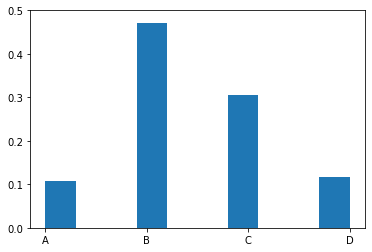

In [85]:
elemsGenerados.sort() #Para que el histograma quede bien el orden, no encontre rapido otra forma y no queria perder mas tiempo

plt.hist(elemsGenerados, weights=np.ones(len(elemsGenerados)) / len(elemsGenerados))
plt.ylim(0, 0.5)

c) Proponga un test para aplicarle a los números al azar generados, y evalúe si los mismos pueden ser aceptados.

Propongo el test de la Chi Cuadrado ya que es muy buena para analisis de frecuencias
de valores y ver si estas se ajustan a las esperadas. Propongo entonces como
hipotesis nula Ho que los numeros generados en mi algoritmo se distribuyen como pide
el ejercicio.

In [86]:
from scipy.stats import chi2
from collections import Counter

limiteSuperior = chi2.ppf(0.95, df=3) #Tengo 4 clases (A, B, C, D) asi que tengo 4 - 1 = 3 grados de libertad (df)
frecEsperada = {'A':int(n*0.1), 'B':int(n*0.5), 'C':int(n*0.3), 'D':int(n*0.1)}
frecObservada = Counter(elemsGenerados)

diffTestResult = sum((frecObservada[i] - frecEsperada[i])**2 / frecEsperada[i] for i in elems)

if diffTestResult <= limiteSuperior:
    print('El test acepta la hipotesis nula :-)')
else:
    print('El test rechaza la hipotesis nula :-(')

El test acepta la hipotesis nula :-)
